In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
df = pd.read_csv('booking_train_set.csv')

In [3]:
df.drop(['index'],axis=1,inplace = True);

In [4]:
# Are people more likely to spend a particular amount of time at different cities? (possibly longer at cheaper destinations) 

In [5]:
# Convert to datetime

df['checkin'] = df['checkin'].apply(lambda x: pd.to_datetime(x))
df['checkout'] = df['checkout'].apply(lambda x: pd.to_datetime(x))

# Get Duration

df['Duration'] = df['checkout'] - df['checkin']
df['Duration'] = df['Duration'].apply(lambda x: x.days)

In [7]:
# Get Labels for Cities

df["city_id"] = df["city_id"].astype('category')
df["cityLabel"] = df["city_id"].cat.codes

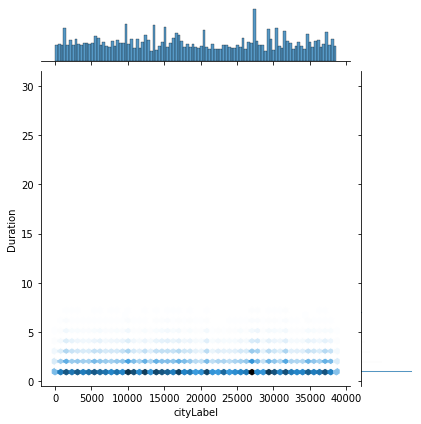

In [9]:
sns.jointplot(x='cityLabel', y='Duration', data=df, kind='hex')

Clearly shorter holidays are more common. However there are some cities that stand out in the longer durations as common long holidays. To investigate further I will calculate the average duration for each city. 

In [12]:
dur_city = pd.crosstab(df.Duration,df.cityLabel)
dur_city.head()

cityLabel,0,1,2,3,4,5,6,7,8,9,...,38628,38629,38630,38631,38632,38633,38634,38635,38636,38637
Duration,,,,,,,,,,,,,,,,,,,,,
1,1,0,17,5,19,0,3,7,0,1,...,7,1,2,0,3,0,92,0,6,0
2,0,1,1,1,5,2,3,0,1,0,...,0,0,0,1,0,1,3,1,0,1
3,0,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
temp_arr = []
for i in range(38638):
    temp_arr.append(round((dur_city[i]*dur_city.index).sum()/dur_city[i].sum()))

In [37]:
print(temp_arr)

[1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 3, 1, 3, 1, 2, 1, 1, 1, 1, 2, 4, 3, 2, 1, 2, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 3, 1, 1, 2, 2, 1, 1, 3, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 2, 1, 1, 1, 1, 4, 1, 4, 1, 3, 3, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 3, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 5, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 4, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 5, 1, 

In [42]:
d = {x:temp_arr.count(x) for x in temp_arr}
temp = pd.Series(d)
temp.sort_index()

1     23566
2     11236
3      2286
4       908
5       259
6       139
7       149
8        45
9        18
10        9
11        7
12        3
13        1
14        7
15        1
16        2
21        1
22        1
dtype: int64

In [44]:
dur_city.sum(axis=1)

Duration
1     606857
2     254631
3     111663
4      42819
5      16424
6       7006
7       5557
8       1359
9        676
10       529
11       249
12       176
13       126
14       250
15        73
16        34
17        26
18        19
19        12
20        13
21        21
22         6
23         3
24         5
25         1
26         1
27         3
28        12
29         7
30        17
dtype: int64

The data shows the number of cities where x is the average stay. The skew fits the the skew of the frequency data. This suggests the extremes on the number of days were contributed to by a smaller amount of data. This suggets they may annomolous and thus would not be useful in classifiying the cities. The pattern seems to stem from the duration data rather than cities and thereby not as useful for classification. 
